In [1]:
import pandas as pd
import numpy as np
import requests

#📌 Extracción

In [2]:
url = "https://raw.githubusercontent.com/sthemonica/alura-voz/refs/heads/main/Dados/Telco-Customer-Churn.json"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df.shape

(7267, 6)

#🔧 Transformación

In [4]:
datos = pd.json_normalize(data)
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
datos.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [7]:
for col in datos.columns:
  print(f'{col:<30} ===> {datos[col].unique()}\n')

customerID                     ===> ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn                          ===> ['No' 'Yes' '']

customer.gender                ===> ['Female' 'Male']

customer.SeniorCitizen         ===> [0 1]

customer.Partner               ===> ['Yes' 'No']

customer.Dependents            ===> ['Yes' 'No']

customer.tenure                ===> [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

phone.PhoneService             ===> ['Yes' 'No']

phone.MultipleLines            ===> ['No' 'Yes' 'No phone service']

internet.InternetService       ===> ['DSL' 'Fiber optic' 'No']

internet.OnlineSecurity        ===> ['No' 'Yes' 'No internet service']

internet.OnlineBackup          ===> ['Yes' 'No' 'No internet service']

internet.DeviceProtection      ===> ['N

In [8]:
print("Numero de duplicados", datos.duplicated().sum())

Numero de duplicados 0


In [9]:
print("Numero de Nulos", datos.isnull().sum())

Numero de Nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [10]:
datos.rename(columns = {
    "customerID":"id_cliente",
    "Churn":"Churn",
    "customer.gender":"Genero",
    "customer.SeniorCitizen":"Mayor_edad",
    "customer.Partner":"Pareja",
    "customer.Dependents":"Dependientes",
    "customer.tenure":"Meses_contrato",
    "phone.PhoneService":"Servicio_telefonico",
    "phone.MultipleLines":"Multiples_lineas",
    "internet.InternetService":"Servicio_internet",
    "internet.OnlineSecurity":"Seguridad_online",
    "internet.OnlineBackup":"respaldo_online",
    "internet.DeviceProtection":"Proteccion_dispositivo",
    "internet.TechSupport":"Soporte_tecnico",
    "internet.StreamingTV":"Streaming_TV",
    "internet.StreamingMovies":"Streaming_Movies",
    "account.Contract":"Tipo_contrato",
    "account.PaperlessBilling":"Factura_electronica",
    "account.PaymentMethod":"Metodo_pago",
    "account.Charges.Monthly":"Cobro_mensual",
    "account.Charges.Total":"Cobro_total"
}, inplace=True)

datos["Factura_electronica"] = datos["Factura_electronica"].map({'Yes': True, 'No': False})
datos['Factura_electronica'] = datos['Factura_electronica'].astype('bool')

datos["Mayor_edad"] = datos["Mayor_edad"].map({1: True, 0: False})
datos['Mayor_edad'] = datos['Mayor_edad'].astype('bool')

datos['Pareja'] = datos['Pareja'].map({"Yes": True, "No": False})
datos['Pareja'] = datos['Pareja'].astype('bool')

datos["Dependientes"] = datos["Dependientes"].map({"Yes": True, "No": False})
datos['Dependientes'] = datos['Dependientes'].astype('bool')

datos["Servicio_telefonico"] = datos["Servicio_telefonico"].map({"Yes": True, "No": False})
datos['Servicio_telefonico'] = datos['Servicio_telefonico'].astype('bool')

In [11]:
col_float = ["Cobro_total"]
datos[col_float] = datos[col_float].apply(pd.to_numeric, errors="coerce")
print(datos['Cobro_total'].dtype)

float64


In [12]:
#Identificando valores vacios en Churn
#datos[datos['Churn'].str.strip() == '']
datos = datos[datos['Churn'].str.strip() != '']
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7043 non-null   object 
 1   Churn                   7043 non-null   object 
 2   Genero                  7043 non-null   object 
 3   Mayor_edad              7043 non-null   bool   
 4   Pareja                  7043 non-null   bool   
 5   Dependientes            7043 non-null   bool   
 6   Meses_contrato          7043 non-null   int64  
 7   Servicio_telefonico     7043 non-null   bool   
 8   Multiples_lineas        7043 non-null   object 
 9   Servicio_internet       7043 non-null   object 
 10  Seguridad_online        7043 non-null   object 
 11  respaldo_online         7043 non-null   object 
 12  Proteccion_dispositivo  7043 non-null   object 
 13  Soporte_tecnico         7043 non-null   object 
 14  Streaming_TV            7043 non-null   objec

In [13]:
datos["Cuentas_Diarias"]=round(datos["Cobro_mensual"]/30,2)
datos.head()

,id_cliente,Churn,Genero,Mayor_edad,Pareja,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas,Servicio_internet,...,Proteccion_dispositivo,Soporte_tecnico,Streaming_TV,Streaming_Movies,Tipo_contrato,Factura_electronica,Metodo_pago,Cobro_mensual,Cobro_total,Cuentas_Diarias
0,0002-ORFBO,No,Female,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,True,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,True,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

In [14]:
datos.describe()

,Meses_contrato,Cobro_mensual,Cobro_total,Cuentas_Diarias
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,2.158675
std,24.559481,30.090047,2266.771362,1.003088
min,0.000000,18.250000,18.800000,0.610000
25%,9.000000,35.500000,401.450000,1.180000
50%,29.000000,70.350000,1397.475000,2.340000
75%,55.000000,89.850000,3794.737500,2.990000
max,72.000000,118.750000,8684.800000,3.960000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def evasion_clientes_pie():
  fig, axs = plt.subplots(1,2,figsize=(12, 6))
  fig.subplots_adjust(wspace=0.3)
  fig.suptitle("Evasión de clientes\n", fontsize=20)

  colores = [ '#C6E8BC','#FF5045']
  label_map = {"No": 'Permanece', "Yes": 'Abandono'}
  labels = datos['Churn'].value_counts().index.map(label_map)
  axs[0].pie(datos['Churn'].value_counts(), labels=labels, autopct='%1.1f%%', colors=colores)


  sns.countplot(x=datos['Churn'].map(label_map),hue=datos['Churn'].map(label_map), data=datos, ax=axs[1], palette=colores)
  axs[1].set_title('Cantidad de evasión')
  axs[1].set_ylabel('# Clientes')
  axs[1].set_xlabel('')
  axs[1].spines["top"].set_visible(False)
  axs[1].spines["right"].set_visible(False)


  for patch in axs[1].patches:
      height = patch.get_height()  # Obtener la altura de la barra
      axs[1].text(patch.get_x() + patch.get_width() / 2, height + 20,  # Colocar el texto un poco arriba
                  str(int(height)), ha="center", va="bottom", fontsize=8.5, color="black")


  plt.show()

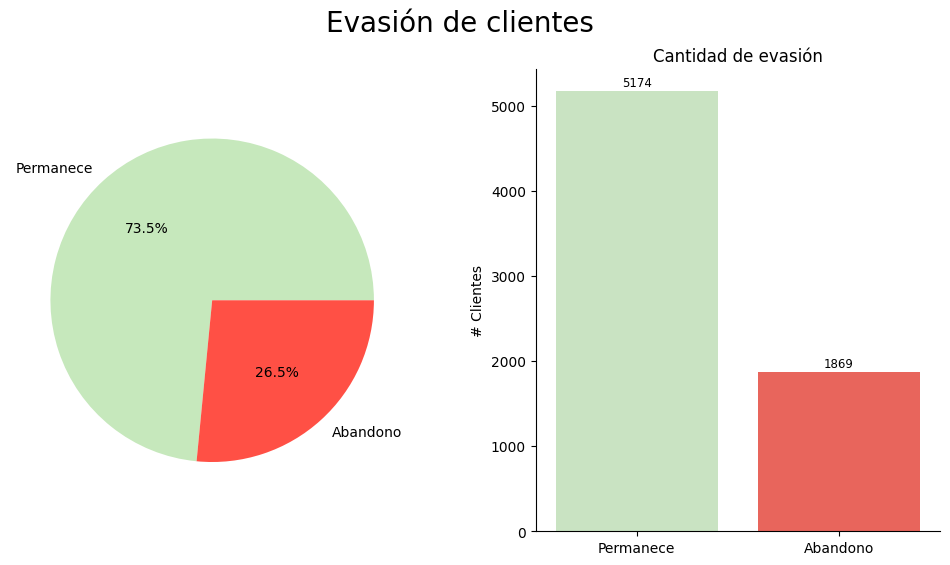

In [17]:
evasion_clientes_pie()

In [18]:
evasion_por_genero = datos.groupby(['Genero'])['Churn'].count()
evasion_por_tipo_contrato = datos.groupby(['Tipo_contrato'])['Churn'].count()
evasion_por_metodo_pago = datos.groupby(['Metodo_pago'])['Churn'].count()
evasion_por_edad = datos.groupby(['Mayor_edad'])['Churn'].count()

In [19]:
def evasion_variables_categoricas():
  fig, axs = plt.subplots(2, 2, figsize=(14, 10))
  fig.subplots_adjust(wspace=0.4, hspace=0.6)
  fig.suptitle("Abandono según variables por Churn", fontsize=24)

  # Genero por Churn
  sns.countplot(x='Genero', hue='Churn', data=datos, ax=axs[0, 0], palette=["#FCE4BB","#B8EAFF"])
  axs[0, 0].set_title("Por Género")
  axs[0, 0].set_xlabel("")
  axs[0, 0].set_ylabel("# Clientes")
  axs[0, 0].spines["top"].set_visible(False)
  axs[0, 0].spines["right"].set_visible(False)

  # Tipo de Contrato por Churn
  sns.countplot(x='Tipo_contrato', hue='Churn', data=datos, ax=axs[0, 1], palette=["#FFCE86","#FFF2DE"]) # Modified palette
  axs[0, 1].set_title("Por Tipo de Contrato")
  axs[0, 1].set_xlabel("")
  axs[0, 1].set_ylabel("# Clientes")
  axs[0, 1].spines["top"].set_visible(False)
  axs[0, 1].spines["right"].set_visible(False)
  axs[0, 1].tick_params(axis='x', rotation=15)

  # Metodo de Pago por Churn
  sns.countplot(y='Metodo_pago', hue='Churn', data=datos, ax=axs[1, 0], palette=["#E6ECFE","#B9C9FE"]) # Modified palette
  axs[1, 0].set_title("Por Método de Pago")
  axs[1, 0].set_xlabel("# Clientes")
  axs[1, 0].set_ylabel("")
  axs[1, 0].spines["top"].set_visible(False)
  axs[1, 0].spines["right"].set_visible(False)

  # Mayor_edad por Churn
  sns.countplot(x='Mayor_edad', hue='Churn', data=datos, ax=axs[1, 1], palette=["#FCE4BB","#B8EAFF"])
  axs[1, 1].set_title("Por Edad")
  axs[1, 1].set_xlabel("")
  axs[1, 1].set_ylabel("# Clientes")
  axs[1, 1].spines["top"].set_visible(False)
  axs[1, 1].spines["right"].set_visible(False)
  axs[1, 1].set_xticklabels(['Menor de 65 años', 'Mayor de 65 años'])


  plt.show()

/tmp/ipython-input-632588012.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(['Menor de 65 años', 'Mayor de 65 años'])


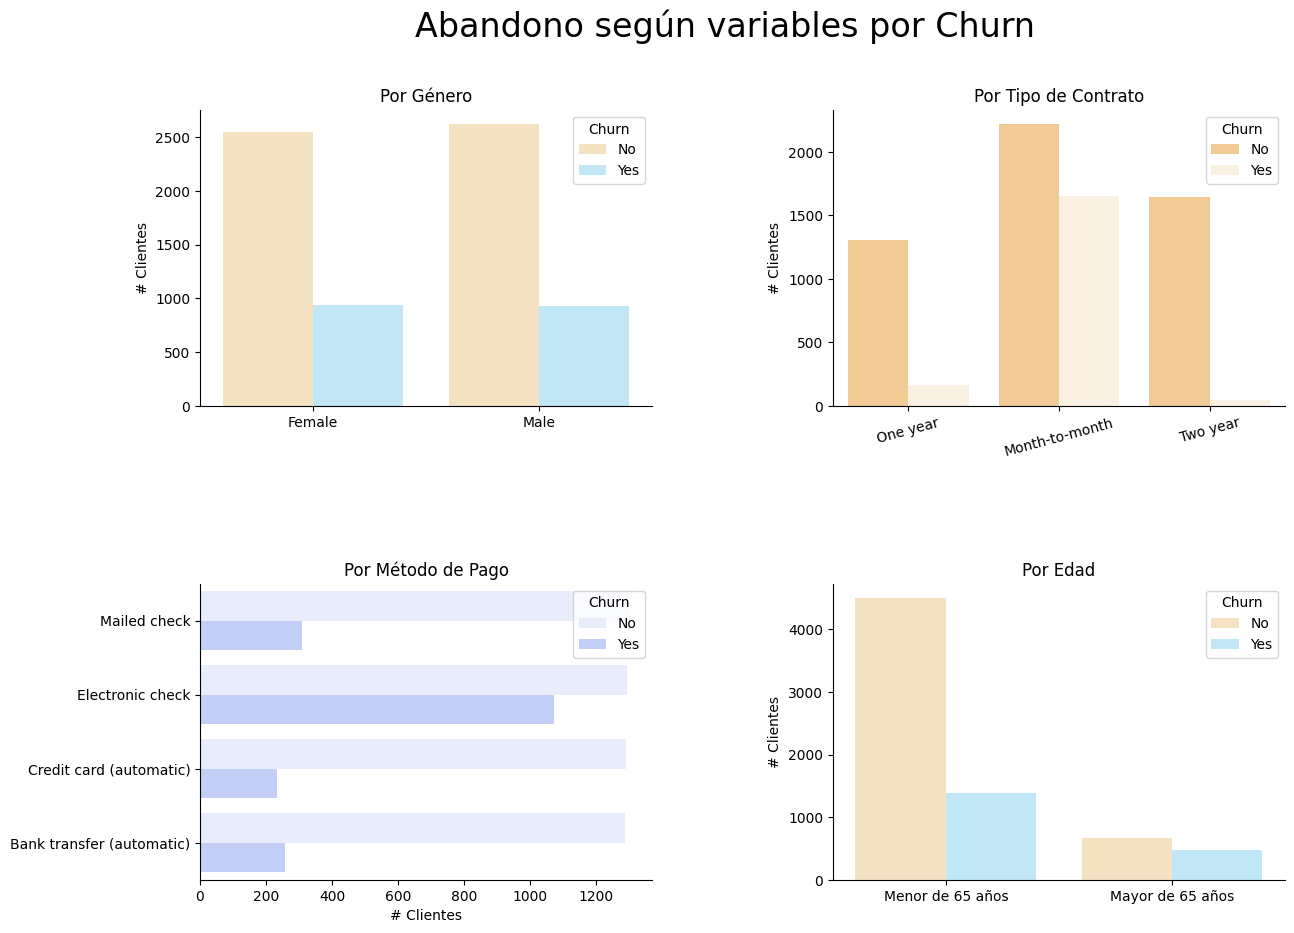

In [20]:
evasion_variables_categoricas()

In [21]:
import plotly.express as px

In [22]:
box_evasion_cobro_mensual = px.box(datos, x = 'Churn', y = 'Cobro_mensual', color = 'Churn', title="Evasion por cobro mensual")
box_evasion_cobro_mensual

In [23]:
box_evasion_cobro_total = px.box(datos, x = 'Churn', y = 'Cobro_total', color = 'Churn', title="Evasion por cobro total")
box_evasion_cobro_total

In [24]:
box_evasion_meses_contrato = px.box(datos, x = 'Churn', y = 'Meses_contrato', color = 'Churn', title="Evasion por meses de contrato")
box_evasion_meses_contrato

#📄Informe final

##🔹 Introducción:
El objetivo de elaborar el presente análisis es comprender la evasión de clientes en la empresa ya que existe una alta tasa de cancelacion y perdida de clientes, motivo por el cual se procedió a la recopilación, procesamiento y analisis del dataset.

##🔹 Limpieza y Tratamiento de Datos:
Como primer paso se realizo la obtencion de datos desde un archivo js mediante el metodo requests.get(url) a la url donde se encontraba el dataset esto en conjunto con el comando response.json(). Posterior a ello se se observo la data la cual tenia campos que no se encontraban normalizados, para solucionar este inconveniente se hizo uso del comando pd.json_normalize().

Luego realizamos un analisis de los tipos de datos, si existian registros duplicados con datos.duplicated() y saber si existian valores nulos. Posterior a esto se realizo un cambio de nombre a los campos para una mejor comprension y
el cambio del tipo de datos segun corresponda.

Considerando que el campo Churn es el principal a analizar se busco que todos sus registros tengan un valor valido por ello se empleo la siguiente linea de codigo: datos[datos['Churn'].str.strip() == '']. Adicionalmente se creo un nuevo campo de costo diario que procede del cobro mensual: datos["Cuentas_Diarias"]=round(datos["Cobro_mensual"]/30,2).


##🔹 Análisis Exploratorio de Datos:
Con los datos obtenidos se hace un analisis por variables cuantitativas y categoricas con respecto a la variable Churn.
Primero evaluamos la evasion en cantidad y porcentaje, observamos que la cantidad que abandonan son aproximadamente 1/3 de los que permanecen lo cual corresponde con el problema inicial de la empresa.

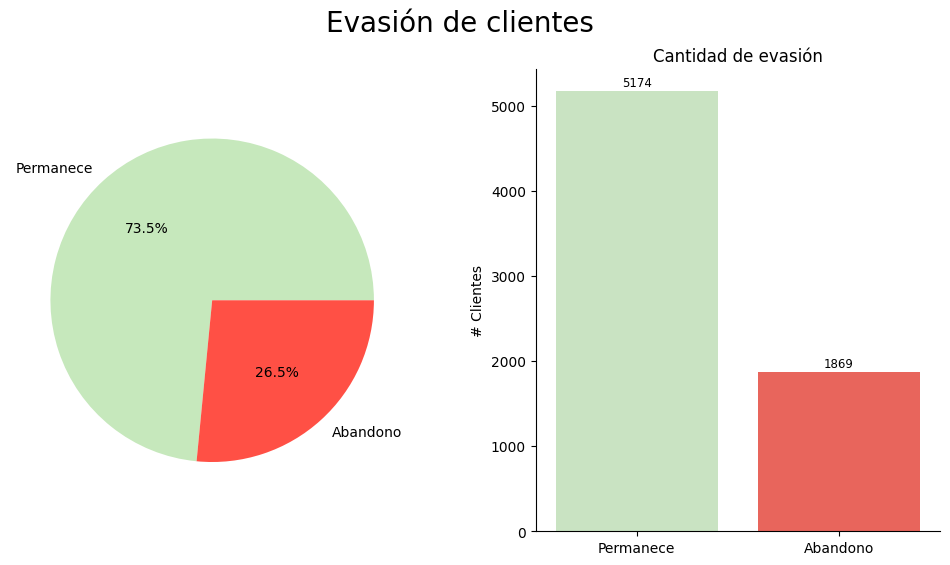

In [25]:
evasion_clientes_pie()

Posterior al analisis de evasion ahora analizamos la evasion pero respecto a variables categóricas como el género, el tipo de contrato, la edad y el método de pago. Por género observamos que los que permanecen tanto en genero femenino y masculino son aproximadamente de la misma cantidad similar a los que no permanecen.

En tanto si analizamos el tipo de contrato los que optan por no permanecer, es decir abandonan se encuentran mayoritariamente en los que optan por un contrato mes a mes siendo una tasa que es 3 veces mas la suma de los otros 2 tipos de contrato y los que menos abandonan son los ue optaron por un contrato de 2 años.

En el caso de el metodo de pago elegido los que mayor tasa de abandono tuvieron son los que eligieron el metodo "Electronic Check" superando los 1000 cuando en los otros 3 tipos de pago esta tasa de abandono no superaba los 400 en cada uno de estos.

Finalmente si analizamos por la edad dividiendo en grupos a menores a 65 y mayores a 65 años en los menores de edad la tasa de abandono es mayor siendo aproximadamente igual a 3 veces la tasa de abandono del grupo mayor a 65 años

/tmp/ipython-input-632588012.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



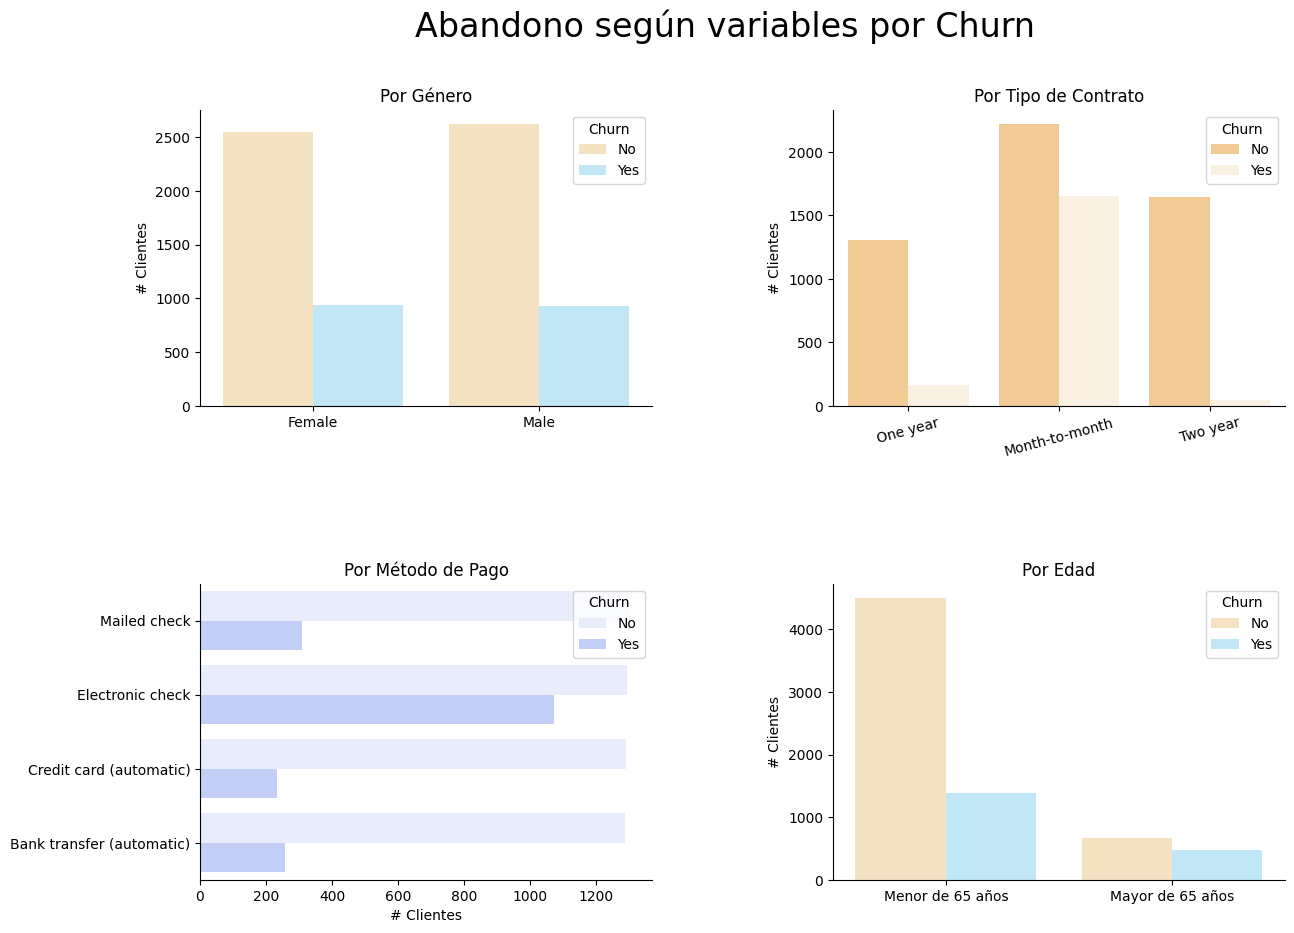

In [26]:
evasion_variables_categoricas()

Ahora procedemos a evaluar la relación del Churn con respecto a variables cuantitativas, por ello hacemos uso de los boxplot mediante pyplot.

Empezamos por la relacion entre Churn y el cobro mensual y observamos que la mediana del cobro mensual de los que abandonan es de 79.65 y de los que no abandonan es de 64.425, los valores de cobro mensual maximo y minimo de ambos grrupos es muy similar. sin embargo otro punto a analizar es el primer cuartil de ambos grupos ya que los que si abandonan el 25% de ellos son menores o iguales a un cobro mensual de 56.15 muy cercano a la mediana de los que no abandonaron, mientra que en el primer cuartil de los que permancen se encuentran con un valor de 25.1.

In [27]:
box_evasion_cobro_mensual

Ahora analizamos la variable costo total con respecto a la variable Churn se entiende que la mediana de los que no abandonaron y los que si abandonaron tiene un valor de 1683.6 y 703.55 respectivamente. Los que abandonaron se encuentran en un valor maximo de 5624.85 aunque se evidencia casos outlier, sin embargo el 3 cuartil 75% de los que permanecen se encuentran con un costo total de 4264 o menor a este.

In [28]:
box_evasion_cobro_total

Finalmente analizamos la variable Churn con respecto a los meses de contrato evidenciando que los que han abandonado el 75% de estos obtuvo un contrato en 29 meses o menos siendo solo un 25% que obtuvo el servicio por mas de 2 años con 5 meses los que lo abandonaron.

In [29]:
box_evasion_meses_contrato


##🔹 Conclusiones e Insights:
Con las variables analizadas observamos que si hay una considerable tasa de abandono sin embargo esta no esta definida por el genero de los clientes, en ambos sexos las proporciones de permanencia o abandono es similar, sin embargo el tipo de contrato y metodo de pago si hacen una distincion ya que entre las opciones que se tienen en cada uno si se observa una gran cantidad de desercion en una de sus opciones por ejemplo en el tipo de contrato mes a mes si hay un gran numero de abandono al igual que en el metodo de pago electronic check. Con respecto a la edad son los menores de 65 años los que mas abandonan el servicio.
Por el cobro mensual se observa que los que abandonaron el servicio pagaban  un poco mas de los que no abandonaron, respecto al cobro total el panorama es distinto ya que los que abandonaron el servicio no tenian un costo total tan elevado como los que se mantienen por lo cual debe existir otros factores aparte del precio que influyen en la tasa de abandono. Finalmente los que evaden el servicio en porcentaje de 75% o menos de esto solo solicitaron los servicios por menos de 29 meses exisitiendo casos en los cuales sobrepasa esta cantidad pero en menor medida, podemos relacionar esto con la edad y tener una hipotesis que los menores de 65 años prueban con los servicios que ofrece una compañia por un tiempo y deciden cambiar a otras para evaluar las ofertas, no necesariamente tiene el hecho de abandono tiene una relacion mayoritaria con el precio total que deben pagar.

##🔹 Recomendaciones:
Como sugerencia se propone analizar los metodos de pago y tipos de contrato variables donde se observa un gran numero de abandono y considerar dar un mejor servicio o mejores condiciones al cliente para disminuir el numero de abandono.

### EXTRA

In [41]:
datos.to_csv("telecom_data.csv", index=False)

In [30]:
datos_correlacion = datos.copy()

In [31]:
# Convertir columnas booleanas a numéricas (True -> 1, False -> 0)
boolean_columns = ['Mayor_edad', 'Pareja', 'Dependientes', 'Servicio_telefonico', 'Factura_electronica']
datos_correlacion[boolean_columns] = datos_correlacion[boolean_columns].astype(int)

In [32]:
# Convertir la columna 'Churn' a 0 y 1 (Si Churn significa 'abandonar', probablemente 0=No, 1=Yes)
datos_correlacion['Churn'] = datos_correlacion['Churn'].map({'No': 0, 'Yes': 1})


In [33]:
# Convertir las columnas categóricas (de tipo object) a variables dummy (0 o 1)
categorical_columns = ['Genero', 'Multiples_lineas', 'Servicio_internet', 'Seguridad_online',
                       'respaldo_online', 'Proteccion_dispositivo', 'Soporte_tecnico',
                       'Streaming_TV', 'Streaming_Movies', 'Tipo_contrato', 'Metodo_pago']


In [34]:
datos_corr = pd.get_dummies(datos_correlacion, columns=categorical_columns)

In [35]:
datos_corr.sample(3)

,id_cliente,Churn,Mayor_edad,Pareja,Dependientes,Meses_contrato,Servicio_telefonico,Factura_electronica,Cobro_mensual,Cobro_total,...,Streaming_Movies_No,Streaming_Movies_No internet service,Streaming_Movies_Yes,Tipo_contrato_Month-to-month,Tipo_contrato_One year,Tipo_contrato_Two year,Metodo_pago_Bank transfer (automatic),Metodo_pago_Credit card (automatic),Metodo_pago_Electronic check,Metodo_pago_Mailed check
2358,3285-UCQVC,1,0,0,0,37,0,0,28.60,973.55,...,True,False,False,True,False,False,False,True,False,False
7260,9985-MWVIX,1,0,0,0,1,1,1,70.15,70.15,...,True,False,False,True,False,False,False,False,False,True
2395,3345-JHUEO,0,0,0,0,4,1,1,20.20,55.70,...,False,True,False,True,False,False,False,False,True,False


In [36]:
datos_corr = datos_corr.drop(columns=['id_cliente'])


In [37]:
correlation_matrix = datos_corr.corr()

In [38]:
correlation_matrix.Churn

,Churn
Churn,1.000000
Mayor_edad,0.150889
Pareja,-0.150448
Dependientes,-0.164221
Meses_contrato,-0.352229
Servicio_telefonico,0.011942
Factura_electronica,0.191825
Cobro_mensual,0.193356
Cobro_total,-0.199484
Cuentas_Diarias,0.193412


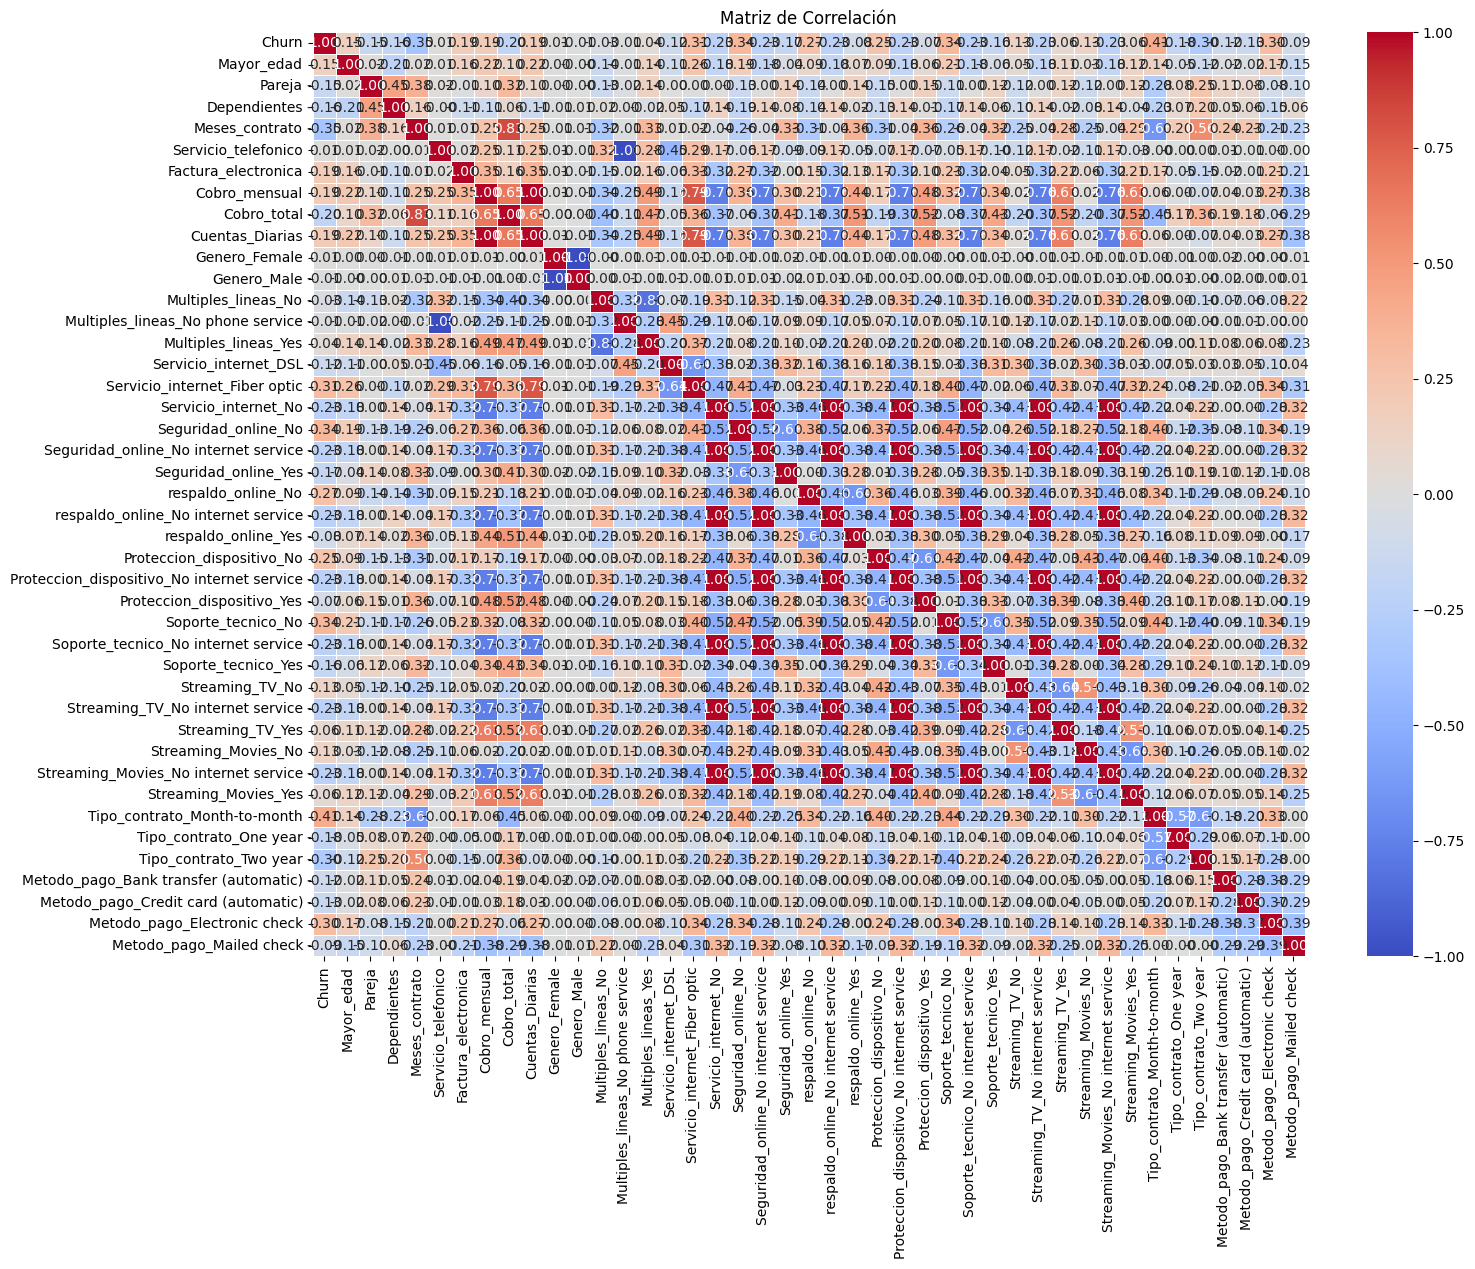

In [39]:
plt.figure(figsize=(16, 12))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()